# Digital Signal Processing (DSP):
## Appendix 2
|Author| Stanley A. Baronett|
|--|-------------------------------|
|Updated | 11/17/2019|

## Graphic Equalizer 
If we instead animate a the time-series of frequency spectra, with each frame a _slice_ along the time-axis, and synchronize the animation with the audio, we can create a ___graphic equalizer___ that dynamically shows how the frequency spectrum as the song plays.

In [2]:
from scipy.io import wavfile as wav
import numpy as np
import matplotlib.pyplot as plt

# import audio
rate2, data2 = wav.read('audio/blues-guitar-lick.wav')
mono2 = np.mean(data2, axis=1) # convert to mono
length2 = mono2.size / rate2   # ID time length

In [3]:
from scipy import signal

M = 1024 # define sample-group size
freqs2, times2, Sx2 = signal.spectrogram(mono2, fs=rate2, window='hanning',
                                      nperseg=1024, noverlap=M - 100,
                                      detrend=False, scaling='spectrum')
z2 = 10 * np.log10(Sx2) # rescale data

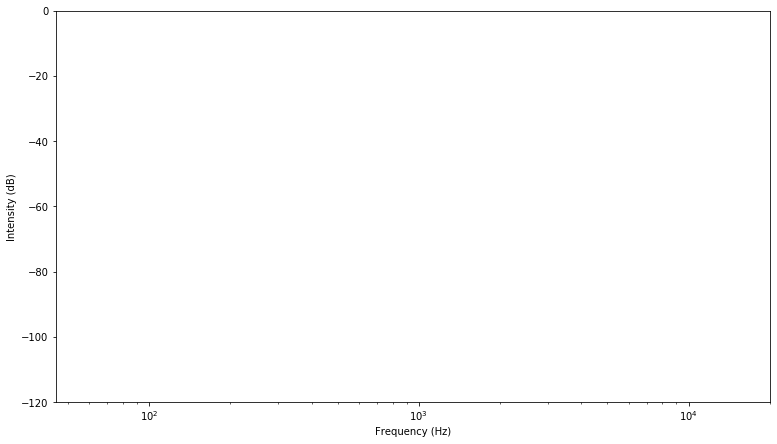

In [4]:
from matplotlib import animation, rc
from IPython.display import HTML

n_samples2 = times2.size
total_frames = int(length2 * 60) # assuming frame-rate of 60 FPS

fig, ax = plt.subplots(figsize=[12.8,7.2]) # 720p resolution
ax.set_xlim(45,20000)
ax.set_ylim(-120, 0)
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Intensity (dB)")
ax.set_xscale('log')
line, = ax.plot([], [])

In [5]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(t):
    jump = int(t * (n_samples2 / total_frames))
    line.set_data(freqs2, z2[:, jump])
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=total_frames, interval=16,
                               blit=True, repeat=False)

# render and embed video
HTML(anim.to_html5_video())

### Add Audio
Of course, the animation has no sound. So I downloaded the video (.mp4) and added and synchronized the audio using a video editor (in my case, Windows 10's built-in "Video Editor"). Here's the result.

In [7]:
from IPython.display import Video

Video("video/blues_eq.mp4", embed=True) # embed audio-synced video